In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score

In [1]:
df = pd.read_csv('../data_clean/AA_Supervised_dataset.csv')
df.head()

NameError: name 'pd' is not defined

In [5]:
# opsplitting in X en y
X = df.drop('ingeschreven', axis=1)
y = df['ingeschreven']

In [6]:
# opsplitting in train en test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['ingeschreven'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210000, 53), (90000, 53), (210000,), (90000,))

In [7]:
from sklearn.cluster import KMeans

kmeans_models = []
inertias = []

for k in range(2, 50, 2):
    print("k =", k)
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X_train)
    kmeans_models.append(kmeans)
    inertias.append(kmeans.inertia_)

k = 2
k = 4
k = 6
k = 8
k = 10
k = 12
k = 14
k = 16
k = 18
k = 20
k = 22
k = 24
k = 26
k = 28
k = 30
k = 32
k = 34
k = 36
k = 38
k = 40
k = 42
k = 44
k = 46
k = 48


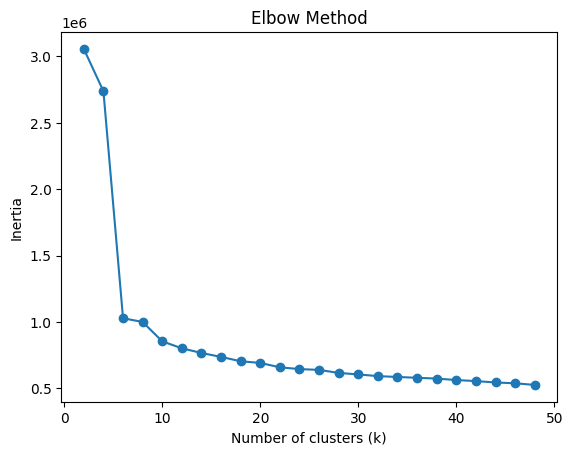

In [9]:
plt.plot(range(2, 50, 2), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_models]
bestK = silhouette_scores.index(max(silhouette_scores)) * 2 + 2

plt.plot(range(2, 50, 2), silhouette_scores, marker='o')
# mark the best k
plt.plot([bestK], [silhouette_scores[bestK // 2 - 1]], marker='o', markersize=12, markeredgewidth=2, markerfacecolor='None', markeredgecolor='red')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs k (number of clusters)')
plt.grid(True)
plt.gcf().set_size_inches(12, 6)
plt.show()

KeyboardInterrupt: 

In [ ]:
print("Best k =", bestK)

In [ ]:
# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=40, random_state=42)
# y_pred = gm.fit_predict(X_train)

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=50, random_state=42)
df_reduced = tsne.fit_transform(X)
df_reduced[:10]

array([[ 1.7369779 , 11.815007  ],
       [ 3.028853  ,  9.518377  ],
       [-0.3787733 ,  8.52145   ],
       [-0.3783555 ,  8.521096  ],
       [-0.3783555 ,  8.521096  ],
       [-0.37846035,  8.521249  ],
       [-0.37846035,  8.521249  ],
       [ 0.18624046, 13.903932  ],
       [16.991753  ,  0.15552972],
       [ 2.8215232 , 11.221913  ]], dtype=float32)

In [16]:
df_reduced = pd.DataFrame(df_reduced, columns=['x', 'y'])
df_unsup = pd.concat([df, df_reduced], axis=1)
df_unsup.head()

,afspraak_Arbeidsmarkt,afspraak_Bedrijfsbeheer,afspraak_Duurzaamheid,afspraak_Familiebedrijfsmanagement,afspraak_Financieel,afspraak_Groeien en Netwerking,afspraak_Internationaal Ondernemen,afspraak_Lidmaatschap,afspraak_Logistiek en Transport,afspraak_Plato & Bryo,...,0_campagne_type,1_campagne_type,2_campagne_type,3_campagne_type,4_campagne_type,5_campagne_type,Online,Offline,x,y
0,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1.736978,11.815007
1,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,3.028853,9.518377
2,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,-0.378773,8.521450
3,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,-0.378356,8.521096
4,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,-0.378356,8.521096


<Axes: xlabel='x', ylabel='y'>

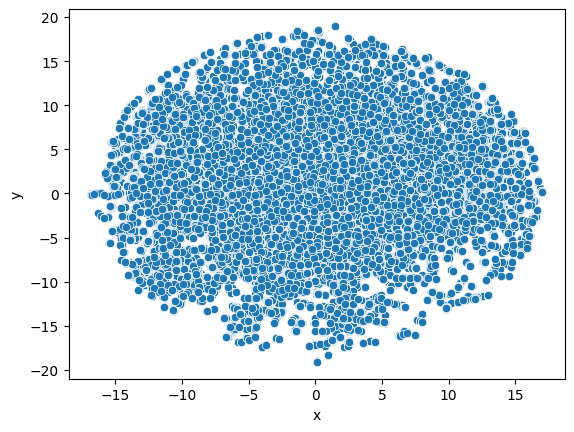

In [19]:
import seaborn as sns

sns.scatterplot(x=df_unsup.x, y=df_unsup.y)

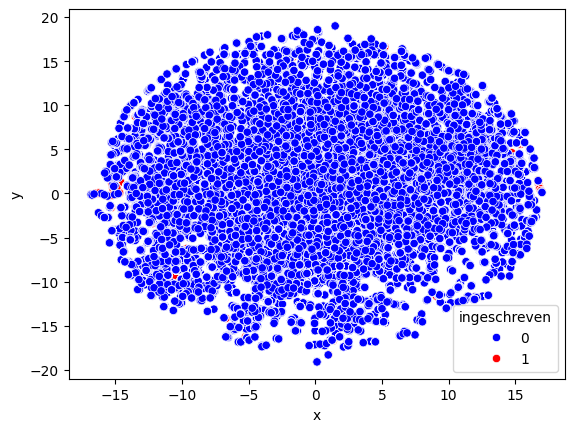

In [32]:
sns.scatterplot(x="x", y="y",hue="ingeschreven",data=df_unsup,palette=['blue','red']);

<Axes: xlabel='x', ylabel='y'>

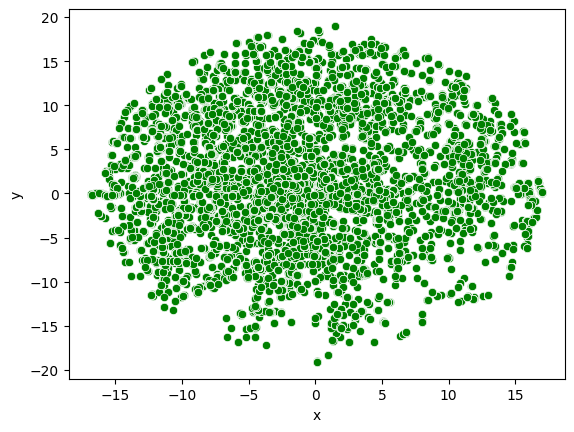

In [33]:
df_ingeschreven_1 = df_unsup[df_unsup['ingeschreven'] == 1]

sns.scatterplot(x="x", y="y", data=df_ingeschreven_1, color='green')

<Axes: xlabel='x', ylabel='y'>

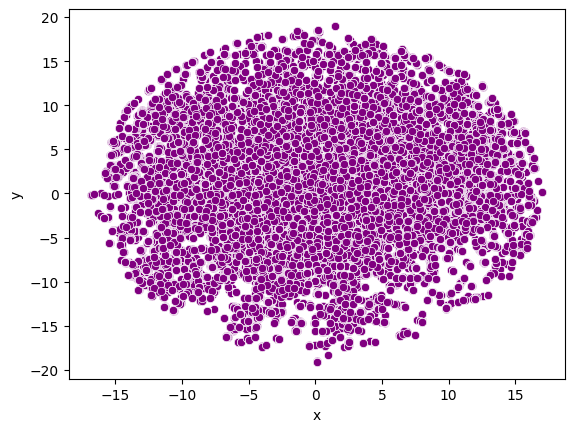

In [35]:
df_ingeschreven_1 = df_unsup[df_unsup['ingeschreven'] == 0]

sns.scatterplot(x="x", y="y", data=df_ingeschreven_1, color='purple')